In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.optimizers import Adam
import tensorflow as tf
import pickle

In [552]:
data = pd.read_csv(r'd:\VM_win10\общая_папка\selenium_crash\my_file.csv')
data

,data,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
0,NaN,6138470,1.08,1709371201421,29437.84,4648,4553,940533.38,-1,-1
1,2024-03-02 12:20:39.051415,6138470,1.08,1709371201421,29437.84,4648,4553,940533.38,6997,3000
2,2024-03-02 12:20:42.623804,6138472,1.16,1709371219889,141584.12,3933,3613,845521.60,6997,3000
3,2024-03-02 12:20:49.870938,6138472,1.16,1709371219889,141584.12,3933,3613,845521.60,6997,3000
4,2024-03-02 12:20:57.021767,6138472,1.16,1709371219889,141584.12,3933,3613,841324.63,6997,3000
...,...,...,...,...,...,...,...,...,...,...
26988,2024-03-16 21:27:44.915696,90162,-1.00,-1,944241.11,6010,2205,385955.42,6997,3000
26989,2024-03-16 21:27:48.093993,90165,-1.00,-1,-1.00,-1,-1,787242.10,6997,3000
26990,2024-03-16 21:27:57.656358,90165,1.02,1710613699177,-1.00,-1,-1,919163.85,6997,3000
26991,2024-03-16 21:28:04.048861,90167,-1.00,-1,-1.00,-1,-1,369571.10,6997,3000


In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26993 entries, 0 to 26992
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        26975 non-null  object 
 1   session     26993 non-null  int64  
 2   multiplier  26993 non-null  float64
 3   session_ls  26993 non-null  int64  
 4   win_amount  26993 non-null  float64
 5   number      26993 non-null  int64  
 6   death       26993 non-null  int64  
 7   Amount      26993 non-null  float64
 8   a           26993 non-null  int64  
 9   w           26993 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ MB


In [554]:
data.describe()

,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
count,2.699300e+04,26993.000000,2.699300e+04,2.699300e+04,26993.000000,26993.000000,2.699300e+04,26993.000000,26993.000000
mean,6.067248e+06,3.002554,1.251929e+12,9.776968e+05,5492.807950,3282.277924,9.202276e+05,6799.739599,2922.298929
std,7.143471e+05,5.730001,7.568770e+11,1.548213e+06,4042.590655,3280.902322,5.898461e+05,1142.869830,475.267329
min,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,6.145749e+06,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,4.456053e+05,6997.000000,3000.000000
50%,6.152366e+06,1.430000,1.709440e+12,2.101780e+05,6090.000000,2623.000000,9.105104e+05,6997.000000,3000.000000
75%,6.158996e+06,3.020000,1.709518e+12,1.330737e+06,8728.000000,5670.000000,1.356867e+06,6997.000000,3000.000000
max,6.173919e+06,34.610000,1.710614e+12,1.192608e+07,14940.000000,14270.000000,2.804765e+06,6998.000000,3000.000000


In [555]:
data['a'].unique()

array([  -1, 6997, 6996, 6742, 6998,    0, 6994, 6995, 4960, 6706,   64,
       6991, 6917, 5036, 6992, 6989, 6990, 6750, 6993, 5019, 6468, 6776,
       3591, 6711, 6862, 6982, 2695, 6952,  590, 6988, 1835, 6275, 6886,
       6333,  364, 1676, 4489, 6373, 3168,   46, 6984, 5728, 5989, 2590,
       5863, 3014, 2676, 3056, 6979, 4508, 1657, 1550,  491, 2211, 1287,
       6955, 3139, 5982, 4123, 6314, 5233, 1049, 6913, 4598, 2562, 1892,
       6694, 6983, 6921, 6936, 6749, 6972, 6766, 6987, 6977, 4349, 6805,
       6441, 6761, 3573, 6875, 2644], dtype=int64)

In [556]:
list_value = [  -1, 6996, 6742, 6998,    0, 6994, 6995, 4960, 6706,   64,
       6991, 6917, 5036, 6992, 6989, 6990, 6750, 6993, 5019, 6468, 6776,
       3591, 6711, 6862, 6982, 2695, 6952,  590, 6988, 1835, 6275, 6886,
       6333,  364, 1676, 4489, 6373, 3168,   46, 6984, 5728, 5989, 2590,
       5863, 3014, 2676]
data[data['a'].isin(list_value)]

,data,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
0,NaN,6138470,1.08,1709371201421,29437.84,4648,4553,940533.38,-1,-1
100,2024-03-02 12:27:44.722160,6138524,2.18,1709371639499,428629.51,3409,2005,793526.46,-1,-1
115,2024-03-02 12:28:59.784675,6138532,3.60,1709371714517,1479235.52,4988,1428,1051626.81,-1,-1
186,2024-03-02 12:33:56.050563,6138569,2.11,1709372007637,829298.39,5316,3014,1073163.57,6996,3000
187,2024-03-02 12:33:59.615542,6138569,2.11,1709372007637,829298.39,5316,3014,1073163.57,6996,3000
...,...,...,...,...,...,...,...,...,...,...
26935,2024-03-16 21:20:14.533771,90105,4.19,1710613236517,1596490.80,6761,1674,906084.92,6998,3000
26940,2024-03-16 21:21:03.240250,90113,2.58,1710613282842,916277.30,7814,3606,280818.78,6998,3000
26941,2024-03-16 21:21:19.252404,90114,1.11,1710613300373,22620.88,8203,8009,1253619.73,6998,3000
26943,2024-03-16 21:21:58.843963,90119,2.78,1710613342619,770739.31,6296,3184,926803.90,6998,3000


In [557]:
list_value = [0,  191, 1826,  596, 2137, 1774, 2745,  472, 1224]
data[data['w'].isin(list_value)]

,data,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
575,2024-03-02 17:21:30.177308,6140735,5.86,1709389298221,2507062.08,7780,939,1000067.99,0,0
1085,2024-03-02 18:13:07.696979,6141124,1.07,1709392384081,-1.00,-1,-1,1345938.61,0,191
1595,2024-03-02 19:04:43.702094,6141509,3.06,1709395464495,1361868.99,9071,4183,399501.01,0,0
1596,2024-03-02 19:04:46.816950,6141512,2.97,1709395489505,2015954.67,10376,4201,1736037.00,0,0
2062,2024-03-02 21:11:10.780504,6142445,28.63,1709403101424,6126582.94,9831,109,1761694.04,0,1826
2202,2024-03-02 21:26:07.080262,6142559,1.37,1709403966258,299210.13,10476,9255,1980549.06,0,596
2300,2024-03-02 21:35:07.764822,6142623,1.20,1709404508949,107089.08,7677,7165,1479936.29,0,2137
3415,2024-03-02 23:38:29.543210,6143548,1.72,1709411908394,461042.76,8290,6675,1485976.81,0,0
4027,2024-03-03 00:42:56.741833,6144024,1.06,1709415768931,22690.93,8826,8736,1519508.02,0,0
4441,2024-03-03 01:25:48.742238,6144343,8.66,1709418359345,4485931.63,9183,1201,1869365.88,0,0


In [558]:
data = data.replace(-1, np.nan)
data = data.dropna()
data.describe()

,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
count,1.536000e+04,15360.000000,1.536000e+04,1.536000e+04,15360.000000,15360.000000,1.536000e+04,15360.000000,15360.000000
mean,6.067095e+06,4.335669,1.709496e+12,1.391439e+06,7690.759505,4575.158724,9.489102e+05,6968.448503,2995.417383
std,7.122271e+05,5.715807,1.465972e+08,1.712380e+06,2470.797949,3039.681519,5.912057e+05,395.883198,110.982944
min,8.966300e+04,1.000000,1.709371e+12,7.604000e+01,89.000000,15.000000,2.337100e+02,0.000000,0.000000
25%,6.145201e+06,1.380000,1.709428e+12,1.487878e+05,5672.750000,2065.000000,4.325621e+05,6997.000000,3000.000000
50%,6.150128e+06,2.090000,1.709480e+12,5.969059e+05,7672.500000,4287.000000,9.297064e+05,6997.000000,3000.000000
75%,6.158634e+06,4.120000,1.709537e+12,2.104679e+06,9473.000000,6802.500000,1.406999e+06,6997.000000,3000.000000
max,6.173919e+06,34.610000,1.710614e+12,1.192608e+07,14940.000000,14236.000000,2.804765e+06,6998.000000,3000.000000


In [559]:
data['data'] = pd.to_datetime(data['data'])

In [560]:
data = data.set_index('data')

In [561]:
data = data.drop_duplicates(['session'])

In [562]:
df = data[['multiplier', 'number', 'Amount']]

In [563]:

scaler = MinMaxScaler()
scaler.fit(df[['number', 'Amount']])
df[['number', 'Amount']] = scaler.transform(df[['number', 'Amount']])
pickle.dump(scaler,open('scaler_prs.pkl', 'wb'))

C:\Users\user\AppData\Local\Temp\ipykernel_23940\3151894338.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['number', 'Amount']] = scaler.transform(df[['number', 'Amount']])


In [564]:
df_new = df.copy()
df_new['second'] = df_new.index.second
df_new['minute'] = df_new.index.minute
df_new['hour'] = df_new.index.hour
df_new.head()

,multiplier,number,Amount,second,minute,hour
data,,,,,,
2024-03-02 12:20:39.051415,1.08,0.306983,0.335852,39,20,12
2024-03-02 12:20:42.623804,1.16,0.258838,0.301916,42,20,12
2024-03-02 12:21:04.151947,1.17,0.251229,0.300417,4,21,12
2024-03-02 12:21:22.038906,1.09,0.255673,0.348549,22,21,12
2024-03-02 12:21:39.905235,1.31,0.244967,0.325965,39,21,12


In [565]:
for lag in range(1, 11):
        df_new['lag_{}'.format(lag)] = df_new['multiplier'].shift(lag)

In [566]:
df_new['rolling_mean'] = df_new['multiplier'].shift().rolling(10).mean()
# Удаляем пропуски
df_new = df_new.dropna(axis=0)

In [567]:
train, test = train_test_split(df_new, shuffle=False, test_size=0.1)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2024-03-02 12:23:41.239211 2024-03-04 21:09:53.079152
2024-03-04 21:10:23.788331 2024-03-16 21:28:20.251225


In [612]:
X_train = train.drop(['multiplier'], axis = 1)
y_train = train['multiplier']
X_test = test.drop(['multiplier'], axis = 1)
y_test = test['multiplier']

In [569]:
X_test

,number,Amount,second,minute,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean
data,,,,,,,,,,,,,,,,
2024-03-04 21:10:23.788331,0.855498,0.652302,23,10,21,5.68,2.40,1.39,3.14,1.56,1.93,1.62,3.95,27.79,5.22,5.468
2024-03-04 21:11:22.442392,0.694162,0.596916,22,11,21,2.19,5.68,2.40,1.39,3.14,1.56,1.93,1.62,3.95,27.79,5.165
2024-03-04 21:11:40.378235,0.680695,0.607414,40,11,21,1.20,2.19,5.68,2.40,1.39,3.14,1.56,1.93,1.62,3.95,2.506
2024-03-04 21:11:55.647116,0.658676,0.620830,55,11,21,1.15,1.20,2.19,5.68,2.40,1.39,3.14,1.56,1.93,1.62,2.226
2024-03-04 21:12:21.160199,0.726483,0.695744,21,12,21,1.69,1.15,1.20,2.19,5.68,2.40,1.39,3.14,1.56,1.93,2.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-16 21:26:33.421596,0.467443,0.419602,33,26,21,2.62,1.30,1.52,1.89,1.44,3.01,1.27,1.15,1.57,1.69,1.746
2024-03-16 21:26:52.875620,0.377550,0.346271,52,26,21,1.15,2.62,1.30,1.52,1.89,1.44,3.01,1.27,1.15,1.57,1.692
2024-03-16 21:27:15.777532,0.385563,0.373441,15,27,21,1.83,1.15,2.62,1.30,1.52,1.89,1.44,3.01,1.27,1.15,1.718


In [570]:
model_l = LGBMRegressor(num_leaves=50, max_depth=7, n_estimators=70)
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
rmse = round(mean_squared_error(y_test, y_pred)**0.5, 3)

print('RMSE на тестовой выборке:', rmse)
pickle.dump(model_l,open('model_lgbm_prs.pkl', 'wb'))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 6418, number of used features: 16
[LightGBM] [Info] Start training from score 4.532911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [613]:
X_train_lstm = X_train.copy()
y_train_lstm = y_train.copy()
# X_train_lstm.reset_index(inplace=True)
# X_train_lstm['data'] = pd.to_datetime(X_train_lstm['data'])
# y_train_lstm = y_train_lstm.reset_index(drop=True)

In [614]:
X_test_lstm = X_test.copy()
y_test_lstm = y_test.copy()
# X_test_lstm.reset_index(inplace=True)
# X_test_lstm['data'] = pd.to_datetime(X_test_lstm['data'])
# y_test_lstm = y_test_lstm.reset_index(drop=True)

In [605]:
# X_train_lstm['data'] = X_train_lstm['data'].apply(lambda x: (x - X_train_lstm['data'].min()).days)
# X_train_lstm['data'] = scaler.fit_transform(X_train_lstm['data'].values.reshape(-1, 1))
# X_test_lstm['data'] = X_test_lstm['data'].apply(lambda x: (x - X_test_lstm['data'].min()).days)
# X_test_lstm['data'] = scaler.fit_transform(X_test_lstm['data'].values.reshape(-1, 1))
# X_scaled_train = scaler.fit_transform(X_train_lstm)
# y_scaled_train = scaler.fit_transform(y_train_lstm.values.reshape(-1, 1))
# X_scaled_test = scaler.fit_transform(X_test_lstm)
# y_scaled_test = scaler.fit_transform(y_test_lstm.values.reshape(-1, 1))

In [597]:
X_scaled_test.shape[1]

17

In [606]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_scaled_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_scaled_train, y_scaled_train, epochs=10, batch_size=32)
train_predictions = model.predict(X_scaled_test)

Epoch 1/10
201/201 [==============================] - 5s 9ms/step - loss: 0.0325
Epoch 2/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0323
Epoch 3/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0324
Epoch 4/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0324
Epoch 5/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0323
Epoch 6/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0323
Epoch 7/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0323
Epoch 8/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0323
Epoch 9/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0322
Epoch 10/10
23/23 [==============================] - 1s 4ms/step


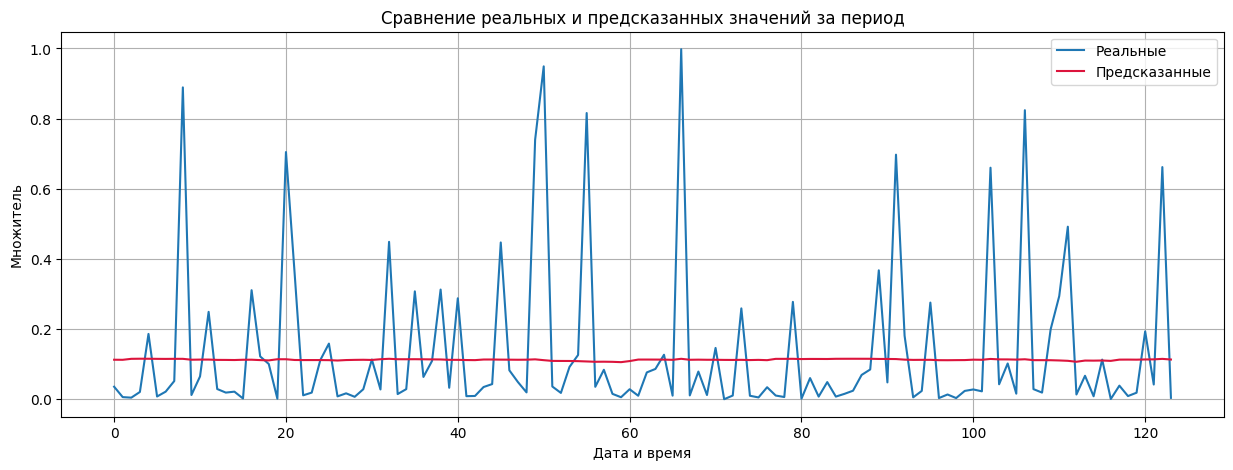

In [607]:
plt.figure(figsize=(15, 5))
plt.xlabel('Дата и время')
plt.ylabel('Множитель')
plt.plot(y_scaled_test[:124], label='Реальные')
plt.plot(train_predictions[:124], label='Предсказанные', color='crimson')
plt.title('Cравнение реальных и предсказанных значений за период')
plt.legend()
plt.grid(True)

In [608]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_scaled_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.0001)  
model.compile(loss='mean_squared_error', optimizer=optimizer)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
model.fit(X_scaled_train, y_scaled_train, epochs=20, batch_size=32,validation_data=(X_scaled_test, y_scaled_test), callbacks=[early_stopping])
train_predictions = model.predict(X_test_lstm)

model.save("model_keras_prs.keras")

Epoch 1/20
201/201 [==============================] - 7s 18ms/step - loss: 0.0332 - val_loss: 0.0292
Epoch 2/20
201/201 [==============================] - 3s 15ms/step - loss: 0.0325 - val_loss: 0.0292
Epoch 3/20
201/201 [==============================] - 3s 14ms/step - loss: 0.0324 - val_loss: 0.0293
Epoch 4/20
201/201 [==============================] - 3s 14ms/step - loss: 0.0323 - val_loss: 0.0292
Epoch 5/20
201/201 [==============================] - 3s 15ms/step - loss: 0.0323 - val_loss: 0.0294
Epoch 6/20
23/23 [==============================] - 1s 5ms/step


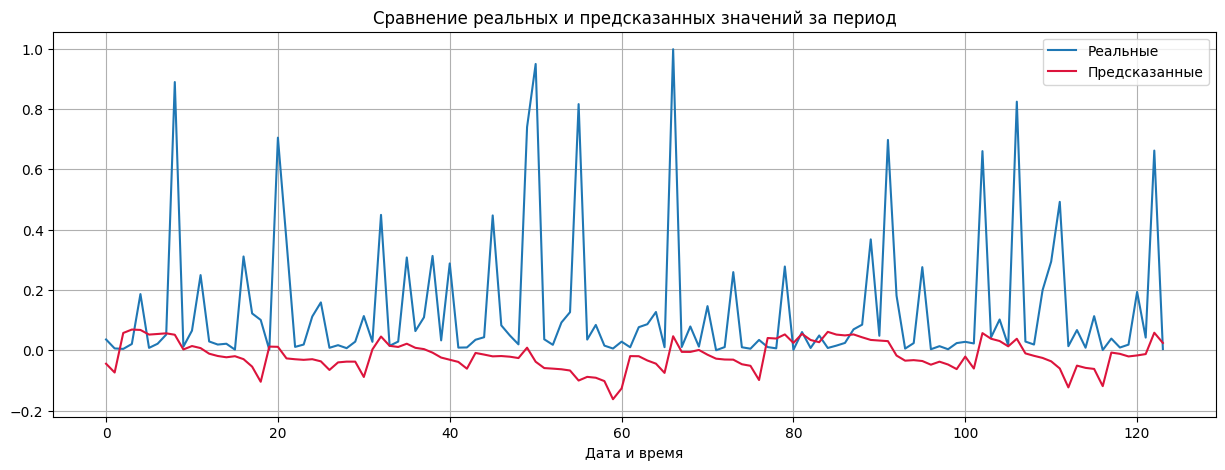

In [611]:
# train_predictions_inverse = scaler.inverse_transform(train_predictions)
plt.figure(figsize=(15, 5))
plt.xlabel('Дата и время')
plt.plot(y_scaled_test[:124], label='Реальные')
plt.plot(train_predictions[:124], label='Предсказанные', color='crimson')
plt.title('Cравнение реальных и предсказанных значений за период')
plt.legend()
plt.grid(True)

In [600]:
model_c = CatBoostRegressor(verbose=False, depth=7, learning_rate=0.03)
model_c.fit(X_train, y_train)
y_pred = model_c.predict(X_test)
rmse = round(mean_squared_error(y_test, y_pred)**0.5, 3)

print('RMSE на тестовой выборке:', rmse)
pickle.dump(model_c,open('model_catboost_prs.pkl', 'wb'))

RMSE на тестовой выборке: 5.799


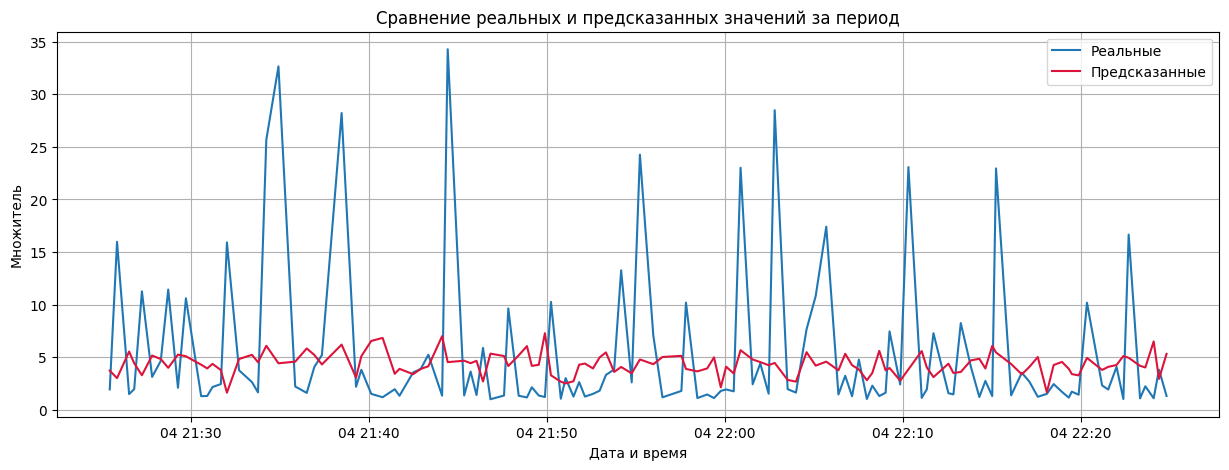

In [394]:
y_pred = pd.Series(y_pred, index=y_test.index)
plt.figure(figsize=(15, 5))
plt.xlabel('Дата и время')
plt.ylabel('Множитель')
plt.plot(y_test['2024-03-04 21:25:00':'2024-03-04 22:25:00'], label='Реальные')
plt.plot(y_pred['2024-03-04 21:25:00':'2024-03-04 22:25:00'], label='Предсказанные', color='crimson')
plt.title('Cравнение реальных и предсказанных значений за период')
plt.legend()
plt.grid(True)

In [316]:
ac = pd.DataFrame(data=y_test)
ac['multiplier_pred'] = y_pred
ac['data'] = ac.index
ac.reset_index(inplace=True, drop=True)

In [317]:
ac_copy = ac.copy()
ac_copy['A'] = pd.Series([None] * len(ac_copy), index=ac_copy.index)

In [318]:
ac_copy['A'] = ac_copy.apply(lambda x: x['multiplier_pred']-3 , axis=1)

In [319]:
ac_copy['A'] = ac_copy.apply(lambda x: x['A'] if x['A']>1 else 1 , axis=1)

In [320]:
ac_copy.set_index('data', inplace=True)

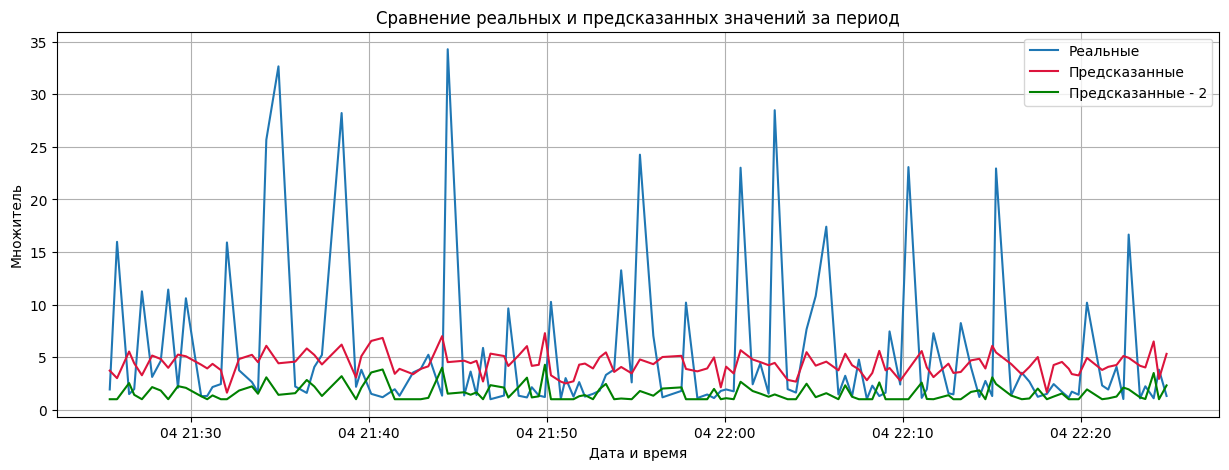

In [321]:
plt.figure(figsize=(15, 5))
plt.xlabel('Дата и время')
plt.ylabel('Множитель')
plt.plot(ac_copy.loc['2024-03-04 21:25:00':'2024-03-04 22:25:00','multiplier'], label='Реальные')
plt.plot(ac_copy.loc['2024-03-04 21:25:00':'2024-03-04 22:25:00', 'multiplier_pred'], label='Предсказанные', color='crimson')
plt.plot(ac_copy.loc['2024-03-04 21:25:00':'2024-03-04 22:25:00', 'A'], label='Предсказанные - 2', color='green')
plt.title('Cравнение реальных и предсказанных значений за период')
plt.legend()
plt.grid(True)

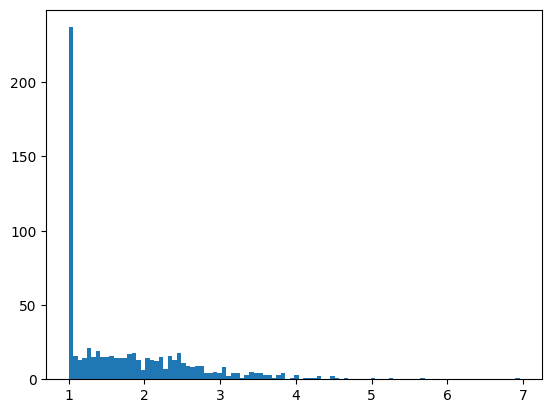

In [322]:
plt.hist(ac_copy['A'], bins=100)
plt.show()

In [323]:
ac_copy['B'] = ac_copy.apply(lambda x: 1 if x['A']<=x['multiplier'] else 0 , axis=1)
percent = np.sum(ac_copy['B']) / len(ac_copy['B']) * 100
print(f"Процент верности: {percent:.2f}%")

Процент верности: 71.71%


In [1]:
def get_model():
    model_c = pickle.load(open('model_catboost_prs.pkl', 'rb'))
    model_l = pickle.load(open('model_lgbm_prs.pkl', 'rb'))
    scaler_model = pickle.load(open('scaler_prs.pkl', 'rb'))
    return model_c, model_l, scaler_model

model_c, model_l, scaler_model = get_model()

while True:
    try: 
        data_new = pd.read_csv(r'd:\VM_win10\общая_папка\selenium_crash\my_file_new.csv')

        # for i in range(data_new.shape[0]-11,data_new.shape[0]-1):
        data = pd.read_csv(r'd:\VM_win10\общая_папка\selenium_crash\my_file.csv')
        data = data.replace(-1, np.nan)
        data = data.dropna()
        data = data.drop_duplicates(['session'])
        data = data.drop(['session','session_ls','win_amount', 'death', 'a', 'w'], axis = 1)  
        data_dict = {'data': [data_new.iloc[-1]['data']], 
                    'multiplier': [data.iloc[-1]['multiplier']], 
                    'number': [data_new.iloc[-1]['number']], 
                    'Amount': [data_new.iloc[-1]['Amount']]
                    }
        data_dict = pd.DataFrame(data_dict)
        data = pd.concat([data, data_dict], ignore_index=True)  
        data['data'] = pd.to_datetime(data['data'])
        data = data.set_index('data')
        data = data.tail(100)
        data['second'] = data.index.second
        data['minute'] = data.index.minute
        data['hour'] = data.index.hour
        for lag in range(1, 11):
            data['lag_{}'.format(lag)] = data['multiplier'].shift(lag) 
        data['rolling_mean'] = data['multiplier'].shift().rolling(10).mean()   
        data = data.drop(['multiplier'], axis = 1)
        
        
        print(data.tail(1)) 
        data[['number', 'Amount']] = scaler_model.transform(data[['number', 'Amount']])  
        y_pred_l = model_l.predict(data.tail(1))   
        y_pred_c = model_c.predict(data.tail(1))          
        print(y_pred_l)     
        print(y_pred_c)                
        time.sleep(0.1)
    except:
        continue
    

NameError: name 'pickle' is not defined